In [24]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
x_data_generated, y_data_generated = make_classification(scale=1)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
score1=float(cross_val_score(LogisticRegression(),x_data_generated,y_data_generated,scoring="accuracy").mean())
score1

0.9

In [25]:
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.745065,0.552556,-0.243539,1.260214,1.162835,0.905386,0.958037,-1.084036,-0.940405,0.834209,...,0.883913,2.458091,0.007362,0.015344,0.091760,2.044985,-3.012573,-0.259836,0.294196,1
1,-0.285421,1.560967,0.144871,2.439074,0.479610,-0.326269,-1.658858,-0.357789,-0.040581,0.330754,...,1.572748,-0.663054,0.046301,-0.495143,-1.458573,-0.343960,-0.756936,-1.116397,-2.739295,1
2,0.402851,0.778240,0.390160,-0.954925,-1.256648,0.251925,1.029052,1.217723,-1.122096,0.382541,...,-0.329891,0.024416,-1.666006,0.437619,0.250141,0.549262,-0.933962,-1.122165,-1.268469,1
3,-1.127886,-0.670476,-0.534544,-0.588667,1.460915,0.084626,-0.171543,-1.445142,-0.507871,-1.675590,...,-0.015229,-0.707533,-0.114524,-0.157364,-2.843204,-0.570645,-0.000667,-0.700161,0.640583,1
4,-0.463851,-0.149109,-0.609196,-0.971212,1.042463,-0.669517,1.434833,-1.114136,0.461379,-0.366798,...,-1.132584,0.940448,2.433163,-1.006164,-0.388126,-0.624341,-0.905805,-0.341679,-0.636664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.254339,0.213556,-0.276531,-0.672738,-0.060003,-1.354462,-0.410414,-0.049324,0.358039,2.043044,...,-1.469402,0.746561,1.556729,1.724392,0.670482,1.036930,0.155790,-1.873826,0.671713,0
96,-2.307677,1.152793,0.542098,0.207372,-1.162514,0.401749,-2.832912,1.192467,-0.873976,1.405622,...,0.587049,-1.260049,1.557292,-1.932538,-0.328776,1.572217,-0.465155,0.707334,0.969295,1
97,-0.692261,-1.359557,0.081487,-0.035242,-0.982836,-0.912552,-0.356021,0.870958,-1.481272,-1.044910,...,-1.359525,2.505687,-0.249052,-0.924597,0.235997,-0.848555,0.913225,1.128746,1.294475,0
98,0.156302,1.961762,0.026379,-0.253190,-1.055850,0.011542,0.041787,0.913391,1.117416,-0.816878,...,-1.761741,2.343107,-0.682714,0.247259,1.465590,0.621821,0.372507,-1.383641,1.499411,0


In [26]:
corr = df.corr()

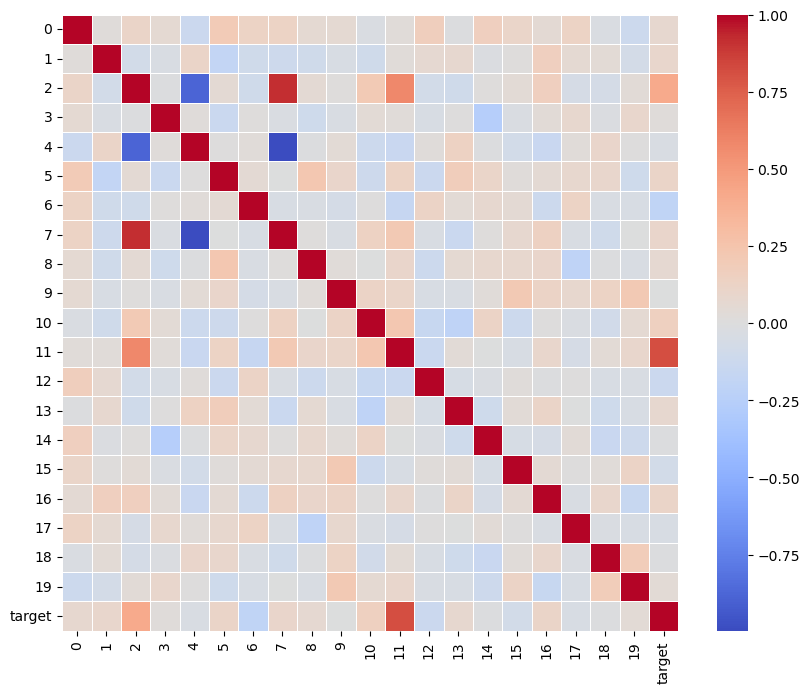

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = "coolwarm", center=0, square = True, linewidths=0.5)
plt.show()

In [28]:
threshold = 0.05
corr_target = corr["target"]
to_drop = corr_target[abs(corr_target) < threshold].index
to_drop = to_drop.drop("target",errors="ignore")

df2= df.drop(columns=to_drop)

In [29]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline

X = df2.drop(columns=["target"])
y = df2["target"]

pipe = Pipeline([
    ("var",VarianceThreshold(threshold=0.01)),
    ("model",LogisticRegression(max_iter=1000))
])

score2 = float(cross_val_score(pipe,X,y,scoring="accuracy",cv=5).mean())
score2

0.9

In [30]:
from sklearn.feature_selection import SelectKBest,f_classif
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
X = df.drop(columns="target")
y = df["target"]

pipe=Pipeline([
    ("select",SelectKBest(score_func=f_classif,k=5)),
    ("model",LogisticRegression(max_iter=1000))
])

score3 = float(cross_val_score(pipe,X,y,scoring="accuracy",cv=5).mean())
score3

0.93

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


pipe_l1 = Pipeline([("scaler", StandardScaler()),
                    ("select",SelectFromModel(LogisticRegression(penalty="l1",solver="liblinear",C=1.0,random_state=42))),
                    ("model",LogisticRegression(solver="liblinear",random_state=42))])
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
X = df.drop(columns="target")
y = df["target"]
score4 = float(cross_val_score(pipe_l1,X,y,cv=5,scoring="accuracy").mean())
score4

0.93

In [33]:
from sklearn.feature_selection import SequentialFeatureSelector

pipe_l1 = Pipeline([("scaler", StandardScaler()),
                    ("select",SequentialFeatureSelector(LogisticRegression(solver="liblinear",random_state=42),n_features_to_select=5,direction="forward",scoring="accuracy",cv=5,n_jobs=-1)),
                    ("model",LogisticRegression(solver="liblinear",random_state=42))])
df = pd.DataFrame(x_data_generated)
df["target"]=y_data_generated
X = df.drop(columns="target")
y = df["target"]
score5 = float(cross_val_score(pipe_l1,X,y,cv=5,scoring="accuracy").mean())
score5

0.93

In [34]:
itog = pd.DataFrame({"Способ выбора признаков":["-","Матрица признаков+VarianceThreshold","SelectKBest","SelectFromModel+RF","SFS"],"Точность":[score1,score2,score3,score4,score5]})
itog

,Способ выбора признаков,Точность
0,-,0.90
1,Матрица признаков+VarianceThreshold,0.90
2,SelectKBest,0.93
3,SelectFromModel+RF,0.93
4,SFS,0.93
